In [ ]:

## for all execution
!mkdir -p local_logs
# create a .env file with the ACCESS_KEY and SECRET_KEY
# .env
# ACCESS_KEY=your_api_key
# SECRET_KEY=localhost


In [1]:
from dotenv import load_dotenv
import os

# Load environment variables from the .env file
load_dotenv()

# Access the variables
ACCESS_KEY = os.getenv('ACCESS_KEY')
SECRET_KEY = os.getenv('SECRET_KEY')


In [2]:
# ACCESS_KEY

In [3]:
# SECRET_KEY

In [4]:
# !sacctmgr show user $USER withassoc



In [5]:
# !echo $ACCESS_KEY
# !echo $SECRET_KEY

In [23]:
#preperation for step 1:

import os
import csv
import glob

# Define file paths
# input_file = "./steps_inputs/step1/atac_pseudobulk_new_peaks_files_mapping.txt"
input_file = "./steps_inputs/step1/missing_atac_pseudobulk_new_peaks_files_mapping.txt"
output_file = "./steps_inputs/step1/missing_atac_pseudobulk_new_bams_files_mapping.txt"
extra_ids_file = "./steps_inputs/step1/extra_bams_ids_not_in_input_file.txt"
bams_dir = "/scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_data/bams"

# Ensure the input file exists
if not os.path.exists(input_file):
    print(f"Input file {input_file} does not exist. Exiting.")
    exit(1)

# Collect ENCSR_IDs from the input file
input_ids = set()
with open(input_file, "r") as infile:
    reader = csv.DictReader(infile)
    for row in reader:
        encsr_id = os.path.basename(row['ID'].strip('/'))
        input_ids.add(encsr_id)

# Collect ENCSR_IDs from the bams_dir
bams_ids = set(next(os.walk(bams_dir))[1])

# Identify extra IDs in bams_dir not present in input file
extra_ids = bams_ids - input_ids

# Write extra IDs to a separate file
with open(extra_ids_file, "w") as extra_file:
    extra_file.write("ENCSR_ID\n")
    for encsr_id in sorted(extra_ids):
        extra_file.write(f"{encsr_id}\n")

# Open the input file and output file for missing rows
with open(input_file, "r") as infile, open(output_file, "w", newline="") as outfile:
    reader = csv.DictReader(infile)
    writer = csv.DictWriter(outfile, fieldnames=reader.fieldnames)

    # Write the header to the output file
    writer.writeheader()

    # Iterate through each row in the input file
    for row in reader:
        # Extract ENCSR_ID from the ID column
        encsr_id = os.path.basename(row['ID'].strip('/'))

        # Construct the search pattern for .bam files
        search_pattern = os.path.join(bams_dir, encsr_id, "*.bam")

        # Check if any matching files exist
        if not glob.glob(search_pattern):
            # Write the missing row to the output file
            writer.writerow(row)

print(f"Missing ENCSR_ID rows have been saved to {output_file}.")
print(f"Extra ENCSR_IDs in {bams_dir} not found in the input file have been saved to {extra_ids_file}.")



In [33]:
# # preperation for step 1:
# import os
# import csv
# import glob

# # File paths
# input_file = "./steps_inputs/step1/7_missing_atac_pseudobulk_new_peaks_files_mapping.txt"
# output_file = "./steps_inputs/step1/missing_atac_pseudobulk_new_bams_files_download_info.txt"
# extra_ids_file = "./steps_inputs/step1/extra_bams_ids_not_in_input_file.txt"
# bams_dir = "/scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_data/bams"

# # Ensure the input file exists
# if not os.path.exists(input_file):
#     print(f"Input file {input_file} does not exist. Exiting.")
#     exit(1)

# # Collect ENCSR_IDs from the input file
# input_ids = set()
# with open(input_file, "r") as infile:
#     reader = csv.DictReader(infile)
#     for row in reader:
#         encsr_id = os.path.basename(row['ID'].strip('/'))
#         input_ids.add(encsr_id)

# # Collect ENCSR_IDs from bams_dir
# bams_ids = set(next(os.walk(bams_dir))[1])

# # Identify extra IDs in bams_dir not present in input file
# extra_ids = bams_ids - input_ids

# # Write extra IDs to a separate file
# with open(extra_ids_file, "w") as extra_file:
#     extra_file.write("ENCSR_ID\n")
#     for encsr_id in sorted(extra_ids):
#         extra_file.write(f"{encsr_id}\n")

# # Prepare output for missing BAMs with download info
# with open(input_file, "r") as infile, open(output_file, "w", newline="") as outfile:
#     reader = csv.DictReader(infile)
#     writer = csv.writer(outfile, delimiter="\t")

#     # Write header
#     # writer.writerow(["ENCSR_ID", "download_url", "EXPECTED_MD5"])

#     for row in reader:
#         encsr_id = os.path.basename(row['ID'].strip('/'))
#         search_pattern = os.path.join(bams_dir, encsr_id, "*.bam")

#         if not glob.glob(search_pattern):
#             download_url = "https://www.encodeproject.org" + row['new_download_url']
#             expected_md5 = row['new_md5']
#             writer.writerow([encsr_id, download_url, expected_md5])

# print(f"Download info for missing BAMs written to {output_file}.")
# print(f"Extra ENCSR_IDs in {bams_dir} not found in input file written to {extra_ids_file}.")


In [34]:
# !chmod +x execute_sbatch_arrays_on_sherlock.py 

# eila_in_download_bams.txt: The input file name.
# step1-download-bams.sh: The SLURM script name.
# 1: entries_per_job (number of entries per job). - how much is each job needs
# 1: max_concurrent_tasks (maximum number of concurrent tasks). - 500 for stanford


# example for input of 1300 lines:
# ./execute_sbatch_arrays_on_sherlock.sh eila_in_download_bams.txt step1-download-bams.sh 500 500
# Breakdown:
# eila_in_download_bams.txt: The input file with 1200 lines.
# step1-download-bams.sh: The SLURM script to run.
# 500: Number of lines per job array (tasks per array).
# 500: Maximum number of concurrent tasks per array.

In [15]:
!ls ./steps_inputs/step1/

7_missing_atac_pseudobulk_new_peaks_files_mapping.txt
atac_pseudobulk_new_peaks_files_mapping.txt
ENCODE_snatac_pseudobulk_replacements_v2_experiemnt_id_bam_url.txt
ENCODE_snatac_pseudobulk_replacements_v2_with_BAM_ENCFF_with_accessions.txt
extra_bams_ids_not_in_input_file.txt
missing_atac_pseudobulk_new_bams_files_download_info.txt.txt
missing_atac_pseudobulk_new_bams_files_mapping.txt
NA_ALL_missing_atac_pseudobulk_new_bams_files_download_info.txt
NA_ENCODE_snatac_pseudobulk_replacements_v2_experiemnt_id_bam_url-debug.txt
NA_ENCODE_snatac_pseudobulk_replacements_v2_with_BAM_ENCFF.txt
NA_missing_bam_files.txt
removed_folders


In [16]:
!wc -l ./steps_inputs/step1/missing_atac_pseudobulk_new_bams_files_download_info.txt
!head -2 ./steps_inputs/step1/missing_atac_pseudobulk_new_bams_files_download_info.txt

7 ./steps_inputs/step1/missing_atac_pseudobulk_new_bams_files_download_info.txt
ENCSR296YTU	https://www.encodeproject.org/files/ENCFF203BUH/@@download/ENCFF203BUH.bam	5686c1272a6bbead5e25f968ebfb555f
ENCSR979LAC	https://www.encodeproject.org/files/ENCFF915GGV/@@download/ENCFF915GGV.bam	5da42702b3bb4823370b98a67eda2bfd


In [17]:
# step 1
from dotenv import load_dotenv
import os

# Load environment variables from the .env file
load_dotenv()

# Access the variables
ACCESS_KEY = os.getenv('ACCESS_KEY')
SECRET_KEY = os.getenv('SECRET_KEY')

# !echo $ACCESS_KEY
# !echo $SECRET_KEY

# !rm ./local_logs/step1.download.*
# '--ntasks=1' in the step1-download-bams.sh script means each job in the job array runs a single task.
# Each task processes a specified **range of rows** from the input file, with the range determined by the 'entries_per_job' value.
# The range of rows assigned to each job is calculated based on its SLURM_ARRAY_TASK_ID, starting from a specific "relative row" based on its job number.
# For example, if 'entries_per_job' is set to 1000:
#   - Job 1 (SLURM_ARRAY_TASK_ID=1) will process rows 1-1000.
#   - Job 2 (SLURM_ARRAY_TASK_ID=2) will process rows 1001-2000.
#   - Job 3 (SLURM_ARRAY_TASK_ID=3) will process rows 2001-3000.
#   - Job 4 (SLURM_ARRAY_TASK_ID=4) will process rows 3001-4000.
#   - Job 5 (SLURM_ARRAY_TASK_ID=5) will process rows 4001-5000.
#
# The concurrency limit '%1000' ensures that no more than 1000 jobs run simultaneously, but it does not affect how many rows each individual job processes.
# Each job processes its own chunk of rows, defined by the entries_per_job setting.
# Stanford limit is around 1000

!./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step1/missing_atac_pseudobulk_new_bams_files_download_info.txt step1-download-bams.sh 7 7




Submitting job array for range 1-7%7
Jobs 63635603 are running...


In [18]:
!ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_data/bams/ENCSR979LAC/

ENCFF915GGV_unsorted.bam


In [19]:
# # step 2 - prepare for step 2 - check how many BAM files are available

# # FIRST:check that we have all the relevant BAMs
# !ls $GROUP_SCRATCH/$USER/encode_pseudobulks/encode_pseudobulks_data/bams/ENCSR*/*unsorted.bam > /oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas/steps_inputs/step2/unsorted_bam_files_list.txt

# !wc -l /oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas/steps_inputs/step2/unsorted_bam_files_list.txt


7 /oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas/steps_inputs/step2/unsorted_bam_files_list.txt


In [55]:
# vhecht:

# step 2 - prepare for step 2 - check how many BAM files are available

# FIRST:check that we have all the relevant BAMs
!ls $GROUP_SCRATCH/vhecht/encode_pseudobulks/encode_pseudobulks_data/bams/ENCSR*/*unsorted.bam > /oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas/steps_inputs/step2/unsorted_bam_files_list.txt

!wc -l /oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas/steps_inputs/step2/unsorted_bam_files_list.txt


1490 /oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas/steps_inputs/step2/unsorted_bam_files_list.txt


In [56]:
# !./execute_sbatch_arrays_on_sherlock.sh
!wc -l ./steps_inputs/step2/unsorted_bam_files_list.txt

1490 ./steps_inputs/step2/unsorted_bam_files_list.txt


In [58]:
!head -6 ./steps_inputs/step2/unsorted_bam_files_list.txt

/scratch/groups/akundaje/vhecht/encode_pseudobulks/encode_pseudobulks_data/bams/ENCSR000RPM/ENCFF902TLW_unsorted.bam
/scratch/groups/akundaje/vhecht/encode_pseudobulks/encode_pseudobulks_data/bams/ENCSR001RCY/ENCFF529ECG_unsorted.bam
/scratch/groups/akundaje/vhecht/encode_pseudobulks/encode_pseudobulks_data/bams/ENCSR001WAB/ENCFF283ZVP_unsorted.bam
/scratch/groups/akundaje/vhecht/encode_pseudobulks/encode_pseudobulks_data/bams/ENCSR002IHA/ENCFF002TJM_unsorted.bam
/scratch/groups/akundaje/vhecht/encode_pseudobulks/encode_pseudobulks_data/bams/ENCSR005MIW/ENCFF971GXP_unsorted.bam
/scratch/groups/akundaje/vhecht/encode_pseudobulks/encode_pseudobulks_data/bams/ENCSR005OQJ/ENCFF663DIE_unsorted.bam


In [23]:
# #step 2 - samtools sort and index
# !rm ./local_logs/step2.samtools.combined.*
# !rm ./local_logs/step2.ENCSR865OGT.combined*
# !chmod +x execute_sbatch_arrays_on_sherlock.sh
!./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step2/unsorted_bam_files_list.txt step2-samtool-sort-index.sh 7 7 



Submitting job array for range 1-7%7
Jobs 63636090 are running...


In [24]:
# %%bash
# BAM_FILE="/scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_data/bams/ENCSR865OGT/ENCFF899ENE_unsorted.bam"
# echo $BAM_FILE
# ENCFF_ID=$(basename $(dirname "$BAM_FILE"))
# echo $ENCSR_ID
# ENCFF_ID=$(basename "$BAM_FILE" | cut -d'_' -f1)
# echo $ENCFF_ID


In [25]:
# !scontrol show config | grep MaxArraySize
# MaxArraySize            = 1000000

In [26]:
!ls ./steps_inputs/step3

atac_pseudobulk_new_peaks_files_mapping-Copy1.txt
atac_pseudobulk_new_peaks_files_mapping.txt
extra_peaks_ids_not_in_input_file.txt
missing_atac_pseudobulk_new_peaks_files_mapping.txt
NA_eila_peaks_matched_to_experiments-debug.txt
NA_eila_peaks_matched_to_experiments.txt
NA_ENCODE_snatac_pseudobulk_replacements_v2_experiment_id_peaks-debug.txt
NA_ENCODE_snatac_pseudobulk_replacements_v2_experiment_id_peaks.txt
NA_ENCODE_snatac_pseudobulk_replacements_v2_with_peaks.csv
NA_missing_peak_files.txt


In [28]:
# ACCESS_KEY

In [29]:
# !ls ./steps_inputs/step3

In [30]:
# !cat ./steps_inputs/step3/atac_pseudobulk_new_peaks_files_mapping-Copy1.txt

In [59]:
!wc ./steps_inputs/step3/atac_pseudobulk_new_peaks_files_mapping.txt

  1491  15982 561344 ./steps_inputs/step3/atac_pseudobulk_new_peaks_files_mapping.txt


In [60]:
!head -3 ./steps_inputs/step3/atac_pseudobulk_new_peaks_files_mapping.txt

ID,Description,Status,Organism,Aliases,old_annotation,new_bed,old_bed,new_download_url,new_md5,old_md5
/annotations/ENCSR429XJF/,snATAC pseudobulk for ENCSR000XQD endothelial cell,in progress,Homo sapiens,anshul-kundaje:single-cell_snATACpseudobulk_level1-ENCSR000XQD-endothelial_cell,/annotations/ENCSR679XHE/,ENCFF599SDP,ENCFF249VQL,/files/ENCFF599SDP/@@download/ENCFF599SDP.bed.gz,2fc818397e13e670057c4a531030c30b,2fc818397e13e670057c4a531030c30b
/annotations/ENCSR720LUF/,snATAC pseudobulk for ENCSR000XQD fibroadipogenic progenitor cell,in progress,Homo sapiens,anshul-kundaje:single-cell_snATACpseudobulk_level1-ENCSR000XQD-fibroadipogenic_progenitor_cell,/annotations/ENCSR391WZC/,ENCFF547IAH,ENCFF170FBL,/files/ENCFF547IAH/@@download/ENCFF547IAH.bed.gz,1e7576dfb1d32ed678c32892499f375d,1e7576dfb1d32ed678c32892499f375d


In [59]:
# !wc ./steps_inputs/step3/missing_peak_files.txt

In [49]:
# !chmod +x execute_sbatch_arrays_on_sherlock.sh

In [61]:
#preperation for step 3:
import os
import csv
import glob

# Define file paths
input_file = "./steps_inputs/step3/atac_pseudobulk_new_peaks_files_mapping.txt"
output_file = "./steps_inputs/step3/missing_atac_pseudobulk_new_peaks_files_mapping.txt"
extra_ids_file = "./steps_inputs/step3/extra_peaks_ids_not_in_input_file.txt"
# peaks_dir = "/scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_data/peaks"
peaks_dir = "/scratch/groups/akundaje/vhecht/encode_pseudobulks/encode_pseudobulks_data/peaks"

# Ensure the input file exists
if not os.path.exists(input_file):
    print(f"Input file {input_file} does not exist. Exiting.")
    exit(1)

# Collect ENCSR_IDs from the input file
input_ids = set()
with open(input_file, "r") as infile:
    reader = csv.DictReader(infile)
    for row in reader:
        encsr_id = os.path.basename(row['ID'].strip('/'))
        input_ids.add(encsr_id)

# Collect ENCSR_IDs from the peaks_dir
peaks_ids = set(next(os.walk(peaks_dir))[1])

# Identify extra IDs in peaks_dir not present in input file
extra_ids = peaks_ids - input_ids

# Write extra IDs to a separate file
with open(extra_ids_file, "w") as extra_file:
    extra_file.write("ENCSR_ID\n")
    for encsr_id in sorted(extra_ids):
        extra_file.write(f"{encsr_id}\n")

# Open the input file and output file for missing rows
with open(input_file, "r") as infile, open(output_file, "w", newline="") as outfile:
    reader = csv.DictReader(infile)
    writer = csv.DictWriter(outfile, fieldnames=reader.fieldnames)

    # Write the header to the output file
    writer.writeheader()

    # Iterate through each row in the input file
    for row in reader:
        # Extract ENCSR_ID from the ID column
        encsr_id = os.path.basename(row['ID'].strip('/'))

        # Construct the search pattern for .bed.gz files
        search_pattern = os.path.join(peaks_dir, encsr_id, "*", "*.bed.gz")

        # Check if any matching files exist
        if not glob.glob(search_pattern):
            # Write the missing row to the output file
            writer.writerow(row)

print(f"Missing ENCSR_ID rows have been saved to {output_file}.")
print(f"Extra ENCSR_IDs in {peaks_dir} not found in the input file have been saved to {extra_ids_file}.")



Missing ENCSR_ID rows have been saved to ./steps_inputs/step3/missing_atac_pseudobulk_new_peaks_files_mapping.txt.
Extra ENCSR_IDs in /scratch/groups/akundaje/vhecht/encode_pseudobulks/encode_pseudobulks_data/peaks not found in the input file have been saved to ./steps_inputs/step3/extra_peaks_ids_not_in_input_file.txt.


In [2]:
!wc -l ./steps_inputs/step3/missing_atac_pseudobulk_new_peaks_files_mapping.txt

1 ./steps_inputs/step3/missing_atac_pseudobulk_new_peaks_files_mapping.txt


In [6]:
cat ./steps_inputs/step3/missing_atac_pseudobulk_new_peaks_files_mapping.txt

ID,Description,Status,Organism,Aliases,old_annotation,new_bed,old_bed,new_download_url,new_md5,old_md5


In [3]:
!wc -l ./steps_inputs/step3/extra_peaks_ids_not_in_input_file.txt

2 ./steps_inputs/step3/extra_peaks_ids_not_in_input_file.txt


In [5]:
cat ./steps_inputs/step3/extra_peaks_ids_not_in_input_file.txt

ENCSR_ID



In [1]:
#step 3 - peaks - independant of BAMS:
from dotenv import load_dotenv
import os

# Load environment variables from the .env file
load_dotenv()

# Access the variables
ACCESS_KEY = os.getenv('ACCESS_KEY')
SECRET_KEY = os.getenv('SECRET_KEY')

!rm ./local_logs/step3.peaks*

# !./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step3/missing_peak_files.txt step3-download-peaks.sh 495 495

# the 500 doesnt need to be the number of lines
# !./execute_sbatch_arrays_on_sherlock_try.sh ./steps_inputs/step3/atac_pseudobulk_new_peaks_files_mapping.txt step3-download-peaks.sh 500 500


# !./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step3/atac_pseudobulk_new_peaks_files_mapping.txt step3-download-peaks.sh 1491



# without chromnbpnet environemnt
# !ACCESS_KEY={ACCESS_KEY} SECRET_KEY={SECRET_KEY} ./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step3/ENCODE_snatac_pseudobulk_replacements_v2_experiment_id_peaks-debug.txt step3-download-peaks.sh 1 1
# atac_pseudobulk_new_peaks_files_mapping-Copy1.csv
!./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step3/eila_peaks_matched_to_experiments.txt step3-download-peaks.sh 1490 500

# debug
# !./execute_sbatch_arrays_on_sherlock.sh /oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas/steps_inputs/step3/eila_peaks_matched_to_experiments-debug.txt step3-download-peaks.sh 2 2


In [25]:
# !squeue --user=$USER

In [2]:
ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_data/peaks/ | wc -l

1492


In [53]:
# vhecht
!ls /scratch/groups/akundaje/vhecht/encode_pseudobulks/encode_pseudobulks_data/peaks/ | wc -l

1492


In [4]:
# # execute step 4-1 to create the input
# !chmod +x step4-1-input-for-peaks-by-blacklist.py
!python step4-1-input-for-peaks-by-blacklist.py

In [5]:

!wc -l ./steps_inputs/step4/peaks_with_organism.txt

1490 ./steps_inputs/step4/peaks_with_organism.txt


In [18]:
# execute step 4-2
# !chmod +x step4-2-filter-peaks-by-blacklist.sh
!rm ./local_logs/step42*
!./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step4/peaks_with_organism.txt step4-2-filter-peaks-by-blacklist.sh 500 500

# debug
# !./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step4/peaks_with_species-debug.txt step4-2-filter-peaks-by-blacklist.sh 2 2


rm: cannot remove ‘./local_logs/step42*’: No such file or directory
Submitting job array for range 1-500%500
Submitting job array for range 501-1000%500
Submitting job array for range 1001-1490%500
Jobs 58282849,58282851,58282853 are running...


In [1]:
# !squeue --user=$USER

In [2]:
ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_data/peaks_blacklist_filter/  | wc -l 

1490


STEP 5:
- preperation one (5-1): read the input file and create peaks_filtered_by_blacklist_merged_with_organism_output.txt with all the ID, organism and peak files.
- preperation two (5-2): read the input file and create missing_nonpeaks_negatives_bed_files_output.txt with all the ID, organims and peak files for missing negative files only (in one of the folds)

In [4]:
# # prepare for step 5-1

# import os
# import pandas as pd
# import glob

# # Define the path based on your environment
# group_scratch = os.getenv('GROUP_SCRATCH')
# user = os.getenv('USER')
# base_path = os.path.join(group_scratch, user, 'encode_pseudobulks', 'encode_pseudobulks_data', 'peaks_blacklist_filter')
# print(f"base_path is {base_path}")

# # Read the file with sample data
# data_file =  './steps_inputs/step5/atac_pseudobulk_new_peaks_files_mapping.txt'

# # Skip the header row by setting header=0
# df = pd.read_csv(data_file, sep=',', header=0, names=['ID','Description','Status','Organism','Aliases','old_annotation','new_bed','old_bed','new_download_url','new_md5','old_md5'])

# # Create a list to hold output rows
# output_rows = []

# # Iterate through each folder name in the DataFrame
# for _, row in df.iterrows():
#     # print(f"Processing ID value: {row['ID']}")
    
#     # Check if the ID can be split into at least 2 parts
#     if len(row['ID'].split("/")) < 2:
#         print(f"Skipping malformed ID: {row['ID']}")
#         continue  # Skip this row if ID is malformed

#     folder = row['ID'].split("/")[-2]
#     organism = row['Organism'].replace(" ","_")
    
#     # print(f"Processing folder: {folder}")  # Folder name print

#     # Use glob to find all relevant .bed.gz files in the specified path
#     search_pattern = os.path.join(base_path, folder, '*', '*_peaks_no_blacklist.bed.gz')
#     files = glob.glob(search_pattern)
    
#     if not files:
#         print(f"No .bed.gz files found for folder {folder}")
    
#     # Add an entry for each found file
#     for file in files:
#         output_rows.append([folder, organism, file])

# # Convert the output list to a DataFrame
# output_df = pd.DataFrame(output_rows, columns=['folder_name', 'organism', 'file_path'])

# # Ensure output directory exists
# output_dir = './steps_inputs/step5/'
# os.makedirs(output_dir, exist_ok=True)

# # Define the output file path
# output_file = os.path.join(output_dir, 'peaks_filtered_by_blacklist_merged_with_organism_output.txt')

# # Save the output DataFrame to a space-delimited file, overwriting if it exists
# output_df.to_csv(output_file, sep=' ', header=False, index=False)

# print(f'Output saved to {output_file}')


In [6]:
# !wc -l ./steps_inputs/step5/peaks_filtered_by_blacklist_merged_with_organism_output.txt


In [5]:
# !head -2 ./steps_inputs/step5/peaks_filtered_by_blacklist_merged_with_organism_output.txt

In [7]:
# !wc -l ./steps_inputs/step5/peaks_filtered_by_blacklist_merged_with_organism_output.txt


In [13]:
# %%bash

# LINE="ENCSR429XJF Homo_sapiens /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_data/peaks_blacklist_filter/ENCSR429XJF/ENCFF599SDP/ENCSR429XJF_ENCFF599SDP_peaks_no_blacklist.bed.gz fold_0,fold_1,fold_2,fold_3,fold_4"

# id_1=$(echo "${LINE}" | awk '{print $1}')  # Extract first field
# organism=$(echo "${LINE}" | awk '{print $2}')  # Extract second field
# id_2=$(echo "${LINE}" | awk -F '/' '{print $(NF-1)}')  # Extract second-to-last field
# PEAKS=$(echo "${LINE}" | awk '{print $3}')  # Extract full path

# echo "Debug: Extracted id_1: ${id_1}, id_2: ${id_2}, organism: ${organism}"
# echo "Debug: Extracted PEAKS: ${PEAKS}"

# # Convert organism to lowercase
# organism=$(echo "$organism" | tr '[:upper:]' '[:lower:]')
# echo "Debug: Converted organism to lowercase: ${organism}"


In [10]:
[i for i in range(5)]

[0, 1, 2, 3, 4]

In [3]:
# preperation 5-2. prepare the list of negative ids that are still missing
import os
import pandas as pd
import glob

# Define the paths based on your environment
group_scratch = os.getenv('GROUP_SCRATCH')
user = os.getenv('USER')

# Define base paths for negative and peaks file locations
base_negative_path = os.path.join(group_scratch, user, 'encode_pseudobulks', 'encode_pseudobulks_negative')
base_peaks_path = os.path.join(group_scratch, user, 'encode_pseudobulks', 'encode_pseudobulks_data', 'peaks_blacklist_filter')

print(f"base_negative_path is {base_negative_path}")
print(f"base_peaks_path is {base_peaks_path}")

# Read the file with sample data (input file)
data_file = './steps_inputs/step5/atac_pseudobulk_new_peaks_files_mapping.txt'
# data_file = './steps_inputs/step5/debug_atac_pseudobulk_new_peaks_files_mapping.txt'
df = pd.read_csv(data_file, sep=',', header=0, names=['ID', 'Description', 'Status', 'Organism', 'Aliases', 'old_annotation', 'new_bed', 'old_bed', 'new_download_url', 'new_md5', 'old_md5'])

# Create a list to hold the output rows
output_rows = []

# Iterate through each folder in the DataFrame
for _, row in df.iterrows():
    folder = row['ID'].split("/")[-2]  # Extract folder from 'ID' column
    organism = row['Organism'].replace(" ", "_").lower()  # Replace spaces with underscores and lower case
    
    # print(f"Processing folder: {folder}, Organism: {organism}")

    # Check for the number of fold files found
    # !ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_negative/*/*/*/fold_*/*nonpeaks_negatives.bed | wc -l
    search_pattern = os.path.join(base_negative_path, organism, folder,'*','fold_*', '*nonpeaks_negatives.bed')
    # print(f"search_pattern is {search_pattern}, Organism {organism}")
    found_files = glob.glob(search_pattern)
    # print(f"found_files are {found_files} \n\n")
    fold_count = len(found_files)
    # print(f"fold_count is {fold_count}, Organism {organism}")

    missing_folds=[]
    if fold_count < 5:
        missing_folds = [f"fold_{i}" for i in range(5) if not any(f"fold_{i}" in f for f in found_files)]
        print(f"Missing folds for folder {folder}, Organism {organism}: {missing_folds}")
        # output_rows.append([folder, organism, ','.join(missing_folds)])
    else:
        # print(f"All fold files found for folder {folder}, Organism {organism}")
        continue

    # Now search for the matching peaks file in the peaks_blacklist_filter directory
    search_pattern_peaks = os.path.join(base_peaks_path, folder,'*' , '*_peaks_no_blacklist.bed.gz')
    # print(f"search_pattern_peaks is {search_pattern_peaks}")
    matching_peaks = glob.glob(search_pattern_peaks)

    # if matching_peaks:
    #     print(f"Found peaks files for {folder}, Organism {organism}. matching_peaks is {matching_peaks}")
    # else:
    #     print(f"No matching peaks file found for {folder}, Organism {organism}")

    output_rows.append([folder, organism, matching_peaks[0] ,','.join(missing_folds)])
    
# Convert the output list to a DataFrame
output_df = pd.DataFrame(output_rows, columns=['folder_name', 'organism','peaks_no_blacklist' ,'missing_folds'])

# Ensure the output directory exists
output_dir = './steps_inputs/step5/'
os.makedirs(output_dir, exist_ok=True)

# Define the output file path
output_file = os.path.join(output_dir, 'missing_peaks_filtered_by_blacklist_merged_with_organism_output.txt')

# Save the output DataFrame to a space-delimited file, overwriting if it exists
output_df.to_csv(output_file, sep=' ', header=False, index=False)

print(f'Output file saved to {output_file}')




base_negative_path is /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_negative
base_peaks_path is /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_data/peaks_blacklist_filter
Output file saved to ./steps_inputs/step5/missing_peaks_filtered_by_blacklist_merged_with_organism_output.txt


In [4]:
!wc -l ./steps_inputs/step5/missing_peaks_filtered_by_blacklist_merged_with_organism_output.txt

0 ./steps_inputs/step5/missing_peaks_filtered_by_blacklist_merged_with_organism_output.txt


In [5]:
!head -5 ./steps_inputs/step5/missing_peaks_filtered_by_blacklist_merged_with_organism_output.txt 

# !wc -l ./steps_inputs/step5/0_100_missing_peaks_filtered_by_blacklist_merged_with_organism_output.txt

In [6]:
# !sed -n '101,200p' ./steps_inputs/step5/missing_peaks_filtered_by_blacklist_merged_with_organism_output.txt > ./steps_inputs/step5/100_200_missing_peaks_filtered_by_blacklist_merged_with_organism_output.txt
# !wc -l ./steps_inputs/step5/100_200_missing_peaks_filtered_by_blacklist_merged_with_organism_output.txt



In [7]:
# !sed -n '201,300p' ./steps_inputs/step5/missing_peaks_filtered_by_blacklist_merged_with_organism_output.txt > ./steps_inputs/step5/200_300_missing_peaks_filtered_by_blacklist_merged_with_organism_output.txt
# !wc -l ./steps_inputs/step5/200_300_missing_peaks_filtered_by_blacklist_merged_with_organism_output.txt



In [8]:
# !sed -n '301,400p' ./steps_inputs/step5/missing_peaks_filtered_by_blacklist_merged_with_organism_output.txt > ./steps_inputs/step5/300_400_missing_peaks_filtered_by_blacklist_merged_with_organism_output.txt
# !wc -l ./steps_inputs/step5/300_400_missing_peaks_filtered_by_blacklist_merged_with_organism_output.txt



In [9]:
# !sed -n '401,500p' ./steps_inputs/step5/missing_peaks_filtered_by_blacklist_merged_with_organism_output.txt > ./steps_inputs/step5/400_500_missing_peaks_filtered_by_blacklist_merged_with_organism_output.txt
# !wc -l ./steps_inputs/step5/400_500_missing_peaks_filtered_by_blacklist_merged_with_organism_output.txt



In [10]:
# !sed -n '501,600p' ./steps_inputs/step5/missing_peaks_filtered_by_blacklist_merged_with_organism_output.txt > ./steps_inputs/step5/500_600_missing_peaks_filtered_by_blacklist_merged_with_organism_output.txt
# !wc -l ./steps_inputs/step5/500_600_missing_peaks_filtered_by_blacklist_merged_with_organism_output.txt



In [11]:
# !sed -n '601,700p' ./steps_inputs/step5/missing_peaks_filtered_by_blacklist_merged_with_organism_output.txt > ./steps_inputs/step5/600_700_missing_peaks_filtered_by_blacklist_merged_with_organism_output.txt
# !wc -l ./steps_inputs/step5/600_700_missing_peaks_filtered_by_blacklist_merged_with_organism_output.txt



In [12]:
# !sed -n '801,900p' ./steps_inputs/step5/missing_peaks_filtered_by_blacklist_merged_with_organism_output.txt > ./steps_inputs/step5/800_missing_peaks_filtered_by_blacklist_merged_with_organism_output.txt
# !wc -l ./steps_inputs/step5/800_missing_peaks_filtered_by_blacklist_merged_with_organism_output.txt



In [20]:
# !head ./steps_inputs/step5/0_200_missing_peaks_filtered_by_blacklist_merged_with_organism_output.txt

In [11]:
# #step 5 - non-peaks / background / negative - human:

# Generate negative for all folds
# !rm ./local_logs/step5.NegativesNoPeaksBackground.*
!./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step5/missing_peaks_filtered_by_blacklist_merged_with_organism_output.txt step5-compute-peak-without-blacklist.sh 80 80


Submitting job array for range 1-80%80
Jobs 60766386 are running...


In [13]:
# total:
!ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_negative/*/*/*/fold_*/*nonpeaks_negatives.bed | wc -l

# 7224
# target: 1490 per fold

7450


In [14]:
1490*5

7450

In [16]:
# 7202+80

In [17]:
!ls -lt $GROUP_SCRATCH/eila/encode_pseudobulks/encode_pseudobulks_negative/*/*/*/fold_0/*nonpeaks_negatives.bed | wc -l
# 1490
!ls -lt $GROUP_SCRATCH/eila/encode_pseudobulks/encode_pseudobulks_negative/*/*/*/fold_1/*nonpeaks_negatives.bed | wc -l
# 1490
!ls -lt $GROUP_SCRATCH/eila/encode_pseudobulks/encode_pseudobulks_negative/*/*/*/fold_2/*nonpeaks_negatives.bed | wc -l
# 1490
!ls -lt $GROUP_SCRATCH/eila/encode_pseudobulks/encode_pseudobulks_negative/*/*/*/fold_3/*nonpeaks_negatives.bed | wc -l
# 1490
!ls -lt $GROUP_SCRATCH/eila/encode_pseudobulks/encode_pseudobulks_negative/*/*/*/fold_4/*nonpeaks_negatives.bed | wc -l
# 1490

!ls -lt $GROUP_SCRATCH/eila/encode_pseudobulks/encode_pseudobulks_negative/*/*/*/*/*nonpeaks_negatives.bed | wc -l
# 7450

1490
1490
1490
1490
1490
7450


In [48]:
!ls -lt $GROUP_SCRATCH/vhecht/encode_pseudobulks/encode_pseudobulks_negative/*/*/*/fold_0/*nonpeaks_negatives.bed | wc -l
# 1490
!ls -lt $GROUP_SCRATCH/vhecht/encode_pseudobulks/encode_pseudobulks_negative/*/*/*/fold_1/*nonpeaks_negatives.bed | wc -l
# 1490
!ls -lt $GROUP_SCRATCH/vhecht/encode_pseudobulks/encode_pseudobulks_negative/*/*/*/fold_2/*nonpeaks_negatives.bed | wc -l
# 1490
!ls -lt $GROUP_SCRATCH/vhecht/encode_pseudobulks/encode_pseudobulks_negative/*/*/*/fold_3/*nonpeaks_negatives.bed | wc -l
# 1490
!ls -lt $GROUP_SCRATCH/vhecht/encode_pseudobulks/encode_pseudobulks_negative/*/*/*/fold_4/*nonpeaks_negatives.bed | wc -l
# 1490

!ls -lt $GROUP_SCRATCH/vhecht/encode_pseudobulks/encode_pseudobulks_negative/*/*/*/*/*nonpeaks_negatives.bed | wc -l
# 7450

1490
1490
1490
1490
1490
7450


In [18]:
1490*5

7450

In [19]:
!ls /scratch/groups/akundaje/eila/

2025_03_26_encodDDe_pseudobulks  encode_pseudobulks
2025_03_26_encode_pseudobulks


STEP 6

***************** 6.1: preperation for step 6-2 ********************
- preperation: write a file with the inputs for all fold chrombpnet pipeline training

In [1]:
# 62
# Total number of currently available for  all folds:
!ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_model_training/*/*/*/fold_*/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5  | wc -l
# 6895 - down
!ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_model_training/*/*/*/fold_0/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5  | wc -l
# 1490 => 1353  DONE!
!ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_model_training/*/*/*/fold_1/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5  | wc -l
# 1406- 1434
!ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_model_training/*/*/*/fold_2/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5  | wc -l
# 1490 -> 1444 changed
!ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_model_training/*/*/*/fold_3/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5  | wc -l
# 1396 => 1373- changed
!ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_model_training/*/*/*/fold_4/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5  | wc -l
# 1419 => 1413 - change 

6801
1294
1371
1353
1371
1412


In [2]:
# rsync -avz --progress --inplace --no-whole-file --partial --timeout=600 /scratch/groups/akundaje/vhecht/encode_pseudobulks/encode_pseudobulks_model_training/ /scratch/groups/akundaje/eila/encode_pseudobulks/vhecht_encode_pseudobulks_model_training/


In [3]:
# vhecht - 62
# Total number of currently available for  all folds:
!ls /scratch/groups/akundaje/vhecht/encode_pseudobulks/encode_pseudobulks_model_training/*/*/*/fold_*/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5  | wc -l
# 7424
!ls /scratch/groups/akundaje/vhecht/encode_pseudobulks/encode_pseudobulks_model_training/*/*/*/fold_0/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5  | wc -l
# 1490
!ls /scratch/groups/akundaje/vhecht/encode_pseudobulks/encode_pseudobulks_model_training/*/*/*/fold_1/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5  | wc -l
# 1484
!ls /scratch/groups/akundaje/vhecht/encode_pseudobulks/encode_pseudobulks_model_training/*/*/*/fold_2/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5  | wc -l
# 1490
!ls /scratch/groups/akundaje/vhecht/encode_pseudobulks/encode_pseudobulks_model_training/*/*/*/fold_3/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5  | wc -l
# 1488
!ls /scratch/groups/akundaje/vhecht/encode_pseudobulks/encode_pseudobulks_model_training/*/*/*/fold_4/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5  | wc -l
# 1472

7450
1490
1490
1490
1490
1490


In [10]:
1470*5

7350

***************** prep for the 6-2: processing the inputs for training ********************

- step1: finds all the BAM_IDs that are missing a model
- step 2: cut into subsets of folds

In [17]:
# /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_data/peaks_blacklist_filter/ENCSR816VHI/ENCFF215RMA/ENCSR816VHI_ENCFF215RMA_peaks_no_blacklist.bed.gz /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_data/bams/ENCSR816VHI/ENCFF548UMP_sorted.bam /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_negative/homo_sapiens/ENCSR816VHI/ENCFF215RMA/fold_0/ENCSR816VHI_ENCFF215RMA_homo_sapiens_nonpeaks_negatives.bed
# !ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_model_training/homo_sapiens/ENCSR809UUL/ENCFF682DGS/fold_0/step62.chrombpnet/auxiliary

# /ENCFF215RMA/fold_0/step62.chrombpnet/auxiliary




In [34]:
import os
import csv
import glob

# Define the output file pattern
output_file_pattern = "./steps_inputs/step6/final_output_fold_*.txt"

# Remove existing output files if they exist
existing_files = glob.glob(output_file_pattern)

if existing_files:
    print(f"Removing {len(existing_files)} existing output files...")  # Debugging line
    for file in existing_files:
        try:
            os.remove(file)
            print(f"Removed: {file}")
        except Exception as e:
            print(f"Error removing {file}: {e}")
else:
    print("No existing output files found. Skipping removal.")


# Define the path to the input file
input_file = './steps_inputs/step6/ENCODE_snatac_pseudobulk_replacements_v2_with_BAM_ENCFF_with_accessions.txt'

# Function to validate and collect file paths
def get_file_paths(species, accession_id, processed_entries):
    base_dir = "/scratch/groups/akundaje/eila/encode_pseudobulks"
    vhecht_base_bam_dir = "/scratch/groups/akundaje/vhecht/encode_pseudobulks"

    # Peaks no blacklist file (using glob)
    peaks_pattern = os.path.join(f"{vhecht_base_bam_dir}/encode_pseudobulks_data/peaks_blacklist_filter/{accession_id}","*",f"{accession_id}_*_peaks_no_blacklist.bed.gz")
    # print(f"peaks_pattern is {peaks_pattern}")
    
    peaks_files = glob.glob(peaks_pattern)
    # print(f"peaks_files is {peaks_files}")
    
    if len(peaks_files)==0:
        print(f"peak file for {accession_id} is missing. skip")
        return  # Skip if peaks file is missing. there are cases like that. for empty accession
    peaks_path = peaks_files[0]

    # Sorted BAM file (using glob)
    # /scratch/groups/akundaje/vhecht/encode_pseudobulks/encode_pseudobulks_data/bams/*/*_sorted.bam
    bam_pattern = f"{vhecht_base_bam_dir}/encode_pseudobulks_data/bams/{accession_id}/*_sorted.bam"
    bam_files = glob.glob(bam_pattern)
    if not bam_files:
        print(f"Bam file for {bam_pattern} is missing. skip")
        return  # Skip if BAM file is missing
    sorted_bam_path = bam_files[0]

    # Iterate over folds
    folds =  ['fold_0', 'fold_1', 'fold_2', 'fold_3', 'fold_4']
    for fold in folds:
        # Check if already processed
        key = (species, accession_id, fold)
        # print(f"key is {key}")
        # print(f"accession_id is {accession_id}")
        
        if key in processed_entries:
            continue  # Skip duplicate processing
        
        # Model file (using glob)
        # model_pattern = f"{base_dir}/encode_pseudobulks_model_training/{species}/{accession_id}/*/{fold}/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5"
        # model_pattern = f"{base_dir}/encode_pseudobulks_model_training/{species}/{accession_id}/*/{fold}/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5"
        model_pattern = f"{vhecht_base_bam_dir}/encode_pseudobulks_model_training/{species}/{accession_id}/*/{fold}/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5"

        
        model_files = glob.glob(model_pattern)
        if model_files:
            # print(f"model_files exists. {model_files}. skip")
            continue  # Skip fold if model already exists

        # Negative file (using glob)
        negative_pattern = f"{vhecht_base_bam_dir}/encode_pseudobulks_negative/{species}/{accession_id}/*/{fold}/{accession_id}_*_nonpeaks_negatives.bed"
        # print(f"negative_pattern is {negative_pattern}")
        
        negative_files = glob.glob(negative_pattern)
        if not negative_files:
            print(f"negative does not exists {negative_files}. skip")
            continue  # Skip fold if negative file is missing
        negative_path = negative_files[0]

        # Extract encff_id from negative_path
        encff_id = negative_path.split("/")[-3]  # Extract the ENCFF ID from the third last directory in the path
        # print(f"encff_id is {encff_id}")
        
        # If all necessary files are present, write to output
        output_line = f"{species} {accession_id} {encff_id} {fold} {peaks_path} {sorted_bam_path} {negative_path}"

        # Write to output file
        output_file_path = f"./steps_inputs/step6/final_output_fold_{fold}.txt"
        with open(output_file_path, 'a') as output_file:
            # print(f"additing to file: {output_file_path}. {output_line} ")
            output_file.write(output_line + "\n")

        # Mark as processed
        processed_entries.add(key)

# Read the input CSV file and process each row
processed_entries = set()  # Track processed entries to prevent duplication
with open(input_file, 'r') as f:
    reader = csv.DictReader(f, delimiter='\t')
    for row in reader:
        species = row['Organism'].lower().replace(' ', '_')
        if species=='':
            continue
        # print(f"species is {species}")
        accession_id = row['new_accession_id']
        # print(f"accession_id is {accession_id}")

        # Call the function to process file paths for the current species and accession ID
        get_file_paths(species, accession_id, processed_entries)


Removing 1 existing output files...
Removed: ./steps_inputs/step6/final_output_fold_fold_1.txt


In [35]:
# !ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_model_training/homo_sapiens/ENCSR001WAB/ENCFF737NQK/fold_0/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5


In [36]:
# file_path = "/scratch/groups/akundaje/vhecht/encode_pseudobulks/encode_pseudobulks_negative/homo_sapiens/ENCSR429XJF/ENCFF599SDP/fold_0/ENCSR429XJF_ENCFF599SDP_homo_sapiens_nonpeaks_negatives.bed"

# try:
#     with open(file_path, 'r') as file:
#         print(f"File '{file_path}' is accessible and opened successfully!")
#         file_content = file.read(100)  # Read the first 100 characters to verify content
#         print(f"First 100 characters of the file: {file_content}")
# except PermissionError:
#     print(f"Permission error: Cannot access the file {file_path}.")
# except FileNotFoundError:
#     print(f"File not found: {file_path}.")
# except Exception as e:
#     print(f"An error occurred: {e}")


In [37]:
!ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_model_training/*/*/*/fold_0/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5 | wc -l
!ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_model_training/*/*/*/fold_1/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5 | wc -l
!ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_model_training/*/*/*/fold_2/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5 | wc -l
!ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_model_training/*/*/*/fold_3/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5 | wc -l
!ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_model_training/*/*/*/fold_4/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5 | wc -l

1294
1369
1353
1371
1412


In [38]:
%%bash
wc -l ./steps_inputs/step6/final_output_fold_fold_0.txt
wc -l ./steps_inputs/step6/final_output_fold_fold_1.txt
wc -l ./steps_inputs/step6/final_output_fold_fold_2.txt
wc -l ./steps_inputs/step6/final_output_fold_fold_3.txt
wc -l ./steps_inputs/step6/final_output_fold_fold_4.txt

wc: ./steps_inputs/step6/final_output_fold_fold_0.txt: No such file or directory


2 ./steps_inputs/step6/final_output_fold_fold_1.txt


wc: ./steps_inputs/step6/final_output_fold_fold_2.txt: No such file or directory
wc: ./steps_inputs/step6/final_output_fold_fold_3.txt: No such file or directory
wc: ./steps_inputs/step6/final_output_fold_fold_4.txt: No such file or directory


CalledProcessError: Command 'b'wc -l ./steps_inputs/step6/final_output_fold_fold_0.txt\nwc -l ./steps_inputs/step6/final_output_fold_fold_1.txt\nwc -l ./steps_inputs/step6/final_output_fold_fold_2.txt\nwc -l ./steps_inputs/step6/final_output_fold_fold_3.txt\nwc -l ./steps_inputs/step6/final_output_fold_fold_4.txt\n'' returned non-zero exit status 1.

***************** step 6-2 execution by folds ********************

***************** fold 0 ********************

In [23]:
# total number of negative avaialble from step 5 for fold 0
!ls -lt $GROUP_SCRATCH/eila/encode_pseudobulks/encode_pseudobulks_negative/*/*/*/fold_0/*nonpeaks_negatives.bed | wc -l
# 1490
!wc -l ./steps_inputs/step6/final_output_fold_fold_0.txt
# 48
# Total number of currently available for fold 0:
# !ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_model_training/*/*/*/fold_0/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5  | wc -l
!ls /scratch/groups/akundaje/vhecht/encode_pseudobulks/encode_pseudobulks_model_training/*/*/*/fold_0/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5  | wc -l


443
wc: ./steps_inputs/step6/final_output_fold_fold_0.txt: No such file or directory
1490


In [20]:
# # !chmod +x step6-2-train.sh
# !rm ./local_logs/step62.chrombpnet.*
# # fold_0 - only missing
!./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step6/final_output_fold_fold_0.txt step6-2-chrombpnet-pipelline.sh 38 38


Submitting job array for range 1-38%38
Jobs 64589547 are running...


***************** fold 1 ********************

In [39]:

# Total number of currently available for fold 1:
!ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_model_training/*/*/*/fold_1/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5  | wc -l
# 862

# total number of negative avaialble from step 5 for fold 1
!ls -lt $GROUP_SCRATCH/eila/encode_pseudobulks/encode_pseudobulks_negative/*/*/*/fold_1/*nonpeaks_negatives.bed | wc -l
# 1490

# fold 1 negatibe available from step 5
!wc -l ./steps_inputs/step6/final_output_fold_fold_1.txt
# 269

# !head ./steps_inputs/step6/final_output_fold_fold_1.txt

1369
634
2 ./steps_inputs/step6/final_output_fold_fold_1.txt


In [40]:
!cat ./steps_inputs/step6/final_output_fold_fold_1.txt


homo_sapiens ENCSR161BCB ENCFF016ISZ fold_1 /scratch/groups/akundaje/vhecht/encode_pseudobulks/encode_pseudobulks_data/peaks_blacklist_filter/ENCSR161BCB/ENCFF016ISZ/ENCSR161BCB_ENCFF016ISZ_peaks_no_blacklist.bed.gz /scratch/groups/akundaje/vhecht/encode_pseudobulks/encode_pseudobulks_data/bams/ENCSR161BCB/ENCFF403OSG_sorted.bam /scratch/groups/akundaje/vhecht/encode_pseudobulks/encode_pseudobulks_negative/homo_sapiens/ENCSR161BCB/ENCFF016ISZ/fold_1/ENCSR161BCB_ENCFF016ISZ_homo_sapiens_nonpeaks_negatives.bed
homo_sapiens ENCSR573VRP ENCFF215KOH fold_1 /scratch/groups/akundaje/vhecht/encode_pseudobulks/encode_pseudobulks_data/peaks_blacklist_filter/ENCSR573VRP/ENCFF215KOH/ENCSR573VRP_ENCFF215KOH_peaks_no_blacklist.bed.gz /scratch/groups/akundaje/vhecht/encode_pseudobulks/encode_pseudobulks_data/bams/ENCSR573VRP/ENCFF338DSA_sorted.bam /scratch/groups/akundaje/vhecht/encode_pseudobulks/encode_pseudobulks_negative/homo_sapiens/ENCSR573VRP/ENCFF215KOH/fold_1/ENCSR573VRP_ENCFF215KOH_homo_sap

In [44]:
# !ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_model_training/*/*/*/fold_0/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5  | wc -l
!ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_model_training/*/ENCSR161BCB/ENCFF016ISZ/fold_1/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5


/scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_model_training/homo_sapiens/ENCSR161BCB/ENCFF016ISZ/fold_1/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5


In [41]:
# chrombpnet_pipeline_extracted_paths_fold_1
!./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step6/final_output_fold_fold_1.txt step6-2-chrombpnet-pipelline.sh 2 2 



Submitting job array for range 1-2%2
Jobs 65078126 are running...


***************** fold 2 ********************

In [14]:

# Total number of currently available for fold 2:
!ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_model_training/*/*/*/fold_2/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5  | wc -l
# 1456

# total number of negative avaialble from step 5 for fold 2
!ls -lt $GROUP_SCRATCH/eila/encode_pseudobulks/encode_pseudobulks_negative/*/*/*/fold_2/*nonpeaks_negatives.bed | wc -l
# 1490

!wc -l ./steps_inputs/step6/final_output_fold_fold_2.txt
# 34

1353
829
wc: ./steps_inputs/step6/final_output_fold_fold_2.txt: No such file or directory


In [24]:
# chrombpnet_pipeline_extracted_paths_fold_2

!./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step6/final_output_fold_fold_2.txt step6-2-chrombpnet-pipelline.sh 24 24



Submitting job array for range 1-24%24
Jobs 64589782 are running...


***************** fold 3 ********************

In [15]:

# Total number of currently available for fold 3:
!ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_model_training/*/*/*/fold_3/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5  | wc -l
# 475

# total number of negative avaialble from step 5 for fold 3
!ls -lt $GROUP_SCRATCH/eila/encode_pseudobulks/encode_pseudobulks_negative/*/*/*/fold_3/*nonpeaks_negatives.bed | wc -l
# 1490


!wc -l ./steps_inputs/step6/final_output_fold_fold_3.txt
# 829

1371
904
wc: ./steps_inputs/step6/final_output_fold_fold_3.txt: No such file or directory


In [26]:
# chrombpnet_pipeline_extracted_paths_fold_3
!./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step6/final_output_fold_fold_3.txt step6-2-chrombpnet-pipelline.sh 141 141



Submitting job array for range 1-141%141
Jobs 64589784 are running...


***************** fold 4 ********************

In [27]:

# Total number of currently available for fold 4:
!ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_model_training/*/*/*/fold_4/step62.chrombpnet/auxiliary/interpret_subsample/modisco_results_profile_scores.h5  | wc -l
# 1008
# total number of negative avaialble from step 5 for fold 4
!ls -lt $GROUP_SCRATCH/eila/encode_pseudobulks/encode_pseudobulks_negative/*/*/*/fold_4/*nonpeaks_negatives.bed | wc -l
# 1490
!wc -l ./steps_inputs/step6/final_output_fold_fold_4.txt
# 51


1412
1066
63 ./steps_inputs/step6/final_output_fold_fold_4.txt


In [28]:
# chrombpnet_pipeline_extracted_paths_fold_4
!./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step6/final_output_fold_fold_4.txt step6-2-chrombpnet-pipelline.sh 63 63


Submitting job array for range 1-63%63
Jobs 64589795 are running...


6.3.1-check the results - nseqspec

In [2]:
# !ls

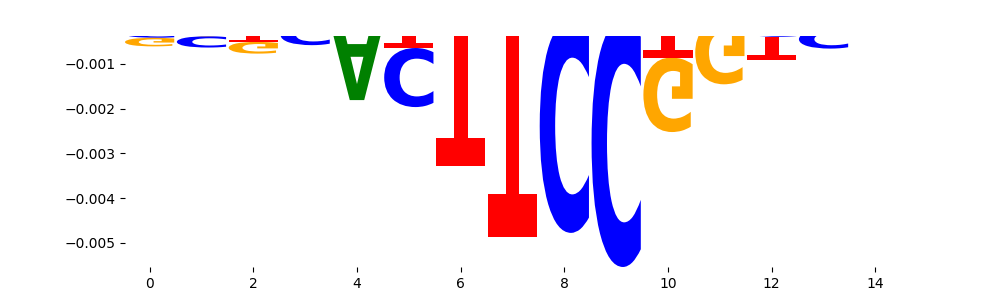

In [3]:
from IPython.display import Image, display

# Display a PNG image
image_path = "/scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR004DZS/ENCFF709MRG/fold_0/step62.bpnetPipeline/qc/out_step_6_3_1_motifs_qc/invalid_images/neg_patterns.pattern_0.cwm.fwd.png"

display(Image(filename=image_path))

In [5]:
# !chmod +x step6-3-1-qc-nseqlet.sh
# !chmod +x step6_3_1_remove_motifs_with_low_numseqs.py
# /scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR004DZS/ENCFF709MRG/fold_0/step62.bpnetPipeline/evaluation/modisco_profile/trimmed_logos
# !./step6-3-1-qc-nseqlet.sh /scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR004DZS/ENCFF709MRG/fold_0/step62.bpnetPipeline/auxiliary/interpret_subsample/modisco_results_profile_scores.h5



6.3.2 -check the results - tomtom bias

In [2]:
# !chmod +x step6-3-2-qc-qval.sh
# !chmod +x step6_3_2_filter_motifs_by_qval.py
# !./step6-3-2-qc-qval.sh /scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR877WNS/ENCFF270AAM/fold_0/step62.bpnetPipeline/auxiliary/interpret_subsample/modisco_results_profile_scores.h5

# !chmod +x step6-3-2-qc-tomtom-bias-tn5.sh
# !chmod +x step6_3_2_filter_motifs_with_TOMTOM_tn5_bias.py
!./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step6_3/debug_one_modisco_results_profile_scores_h5.txt step6-3-2-qa-tomtom-bias-tn5.sh 1 1 




Waiting for jobs 57435004 to complete... Sleeping for 20 minutes.
Waiting for jobs 57435004 to complete... Sleeping for 20 minutes.
All tasks for jobs 57435004 have completed.
Resubmitting job after completion of jobs: 57435004
sbatch: error: =============================================================================
sbatch: error:  ERROR: sleeper job detected
sbatch: error: =============================================================================
sbatch: error:  Sleep jobs are not allowed as they artificially prevent other users from
sbatch: error:  using available resources.
sbatch: error: -----------------------------------------------------------------------------
sbatch: error: Batch job submission failed: Requested operation is presently disabled


In [7]:
!ls step6*

step6-1-create_input_for_all_folds.sh
step6-2-chrombpnet-pipelline.sh
step6-3-1-qc-nseqlet.sh
step6_3_1_remove_motifs_with_low_numseqs.py
step6_3_2_filter_motifs_by_qval.py
step6-3-2-qc-qval.sh
step6_3_3_filter_motifs_with_tn5_bias.py
step6-3-3-qc-bias-tn5.sh
step6-3-review-pipeline-report.sh


6.3.3 -check the for tn5 bias

In [34]:
#prepare debug data for step 6-3-3:
# !ls /scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/*/*/fold_0/step62.bpnetPipeline/auxiliary/interpret_subsample/modisco_results_profile_scores.h5 > ./steps_inputs/step6_3/debug_modisco_results_profile_scores_h5.txt
# !wc ./steps_inputs/step6_3/debug_modisco_results_profile_scores_h5.txt


   617    617 128953 ./steps_inputs/step6_3/debug_modisco_results_profile_scores_h5.txt


In [1]:
!cat ./steps_inputs/step6_3/debug_one_modisco_results_profile_scores_h5.txt

/scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR004DZS/ENCFF709MRG/fold_0/step62.bpnetPipeline/auxiliary/interpret_subsample/modisco_results_profile_scores.h5

In [75]:
!ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_model_training/human/*/*/fold_0/step62.bpnetPipeline/auxiliary/interpret_subsample/modisco_results_profile_scores.h5 | wc -l 



ls: cannot access /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_model_training/human/*/*/fold_0/step62.bpnetPipeline/auxiliary/interpret_subsample/modisco_results_profile_scores.h5: No such file or directory
0


In [1]:
#prepare data for step 6-3-3:
!ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_model_training/*/*/*/fold_0/step62.bpnetPipeline/auxiliary/interpret_subsample/modisco_results_profile_scores.h5 > ./steps_inputs/step6_3/modisco_results_profile_scores_h5.txt
!wc ./steps_inputs/step6_3/modisco_results_profile_scores_h5.txt



  1064   1064 218120 ./steps_inputs/step6_3/modisco_results_profile_scores_h5.txt


In [2]:
# !chmod +x step6-3-3-qc-bias-tn5.sh
# !chmod +x step6_3_3_filter_motifs_with_tn5_bias.py

!rm ./local_logs/633*
# script directly- will fail if the part of task ID is not commented out
# !./step6-3-3-qc-bias-tn5.sh /scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR004DZS/ENCFF709MRG/fold_0/step62.bpnetPipeline/auxiliary/interpret_subsample/modisco_results_profile_scores.h5
# DEBUG
# !./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step6_3/debug_one_modisco_results_profile_scores_h5.txt step6-3-3-qc-bias-tn5.sh 1 1 
# MODEL FOR TF ATLAS
!./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step6_3/modisco_results_profile_scores_h5.txt step6-3-3-qc-bias-tn5.sh 1064 1064


Total entries in input file: 1064
Total number of job arrays to be submitted: 1
Submitting job array from 1 to 1064 with a maximum of 1064 concurrent tasks.
sbatch: defined options
sbatch: -------------------- --------------------
sbatch: array               : 1-1064%1064
sbatch: cpus-per-task       : 4
sbatch: error               : /oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas/local_logs/633_motifs_qc_bias_tn5_%A_%a.err
sbatch: job-name            : 633_motifs_qc_bias_tn5
sbatch: mem                 : 8G
sbatch: ntasks              : 1
sbatch: output              : /oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas/local_logs/633_motifs_qc_bias_tn5_%A_%a.out
sbatch: partition           : akundaje,owners
sbatch: time                : 10:00:00
sbatch: verbose             : 1
sbatch: -------------------- --------------------
sbatch: end of defined options
sbatch: error: Batch job submission failed: Invalid job array specification
All tasks for jobs  have completed.


In [8]:
%%bash
IFS='/' read -r -a path_parts <<< "/scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR004DZS/ENCFF709MRG/fold_0/step62.bpnetPipeline/auxiliary/interpret_subsample/modisco_results_profile_scores.h5"; 

# Print up to the 6th and 7th elements from the end
echo "6th element from the end: ${path_parts[-6]}"
echo "7th element from the end: ${path_parts[-7]}"


6th element from the end: ENCFF709MRG
7th element from the end: ENCSR004DZS


In [1]:
# check which motifs are tn5 biased - debug set

!ls /scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/*/*/fold_0/step62.bpnetPipeline/qc/out_step_6_3_3_motifs_qc_bias_tn5/*invalid_logos/


/scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR004DZS/ENCFF709MRG/fold_0/step62.bpnetPipeline/qc/out_step_6_3_3_motifs_qc_bias_tn5/neg_patterns_invalid_logos/:

/scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR004DZS/ENCFF709MRG/fold_0/step62.bpnetPipeline/qc/out_step_6_3_3_motifs_qc_bias_tn5/pos_patterns_invalid_logos/:


In [4]:
# not biased - debug set

!ls /scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/*/*/fold_0/step62.bpnetPipeline/qc/out_step_6_3_3_motifs_qc_bias_tn5/*valid_logos/* 


ls: cannot access /scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/*/*/fold_0/step62.bpnetPipeline/qc/out_step_6_3_3_motifs_qc_bias_tn5/*valid_logos/*: No such file or directory


In [16]:
!ls /scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR152UIV/ENCFF800VLS/fold_0/step62.bpnetPipeline

# ENCSR000NVR/ENCFF585MYS/fold_0/step62.bpnetPipeline/auxiliary/interpret_subsample/

auxiliary  evaluation  logs  models


In [ ]:
# !ls /scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR004DZS/ENCFF709MRG/fold_0/step62.bpnetPipeline/qc/out_step_6_3_3_motifs_qc_bias_tn5/pos_patterns_invalid_logos



In [1]:
%%bash
ls /scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR004DZS/ENCFF709MRG/fold_0/step62.bpnetPipeline/qc/out_step_6_3_3_motifs_qc_bias_tn5/neg_patterns_valid_logos/



neg_patterns.pattern_0.cwm.fwd.png
neg_patterns.pattern_0.cwm.rev.png
neg_patterns.pattern_1.cwm.fwd.png
neg_patterns.pattern_1.cwm.rev.png


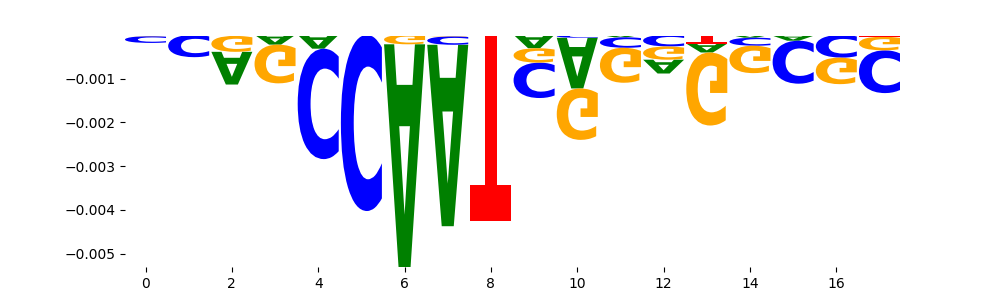

In [5]:
from IPython.display import Image, display

# Display a PNG image
image_path = "/scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR004DZS/ENCFF709MRG/fold_0/step62.bpnetPipeline/qc/out_step_6_3_3_motifs_qc_bias_tn5/neg_patterns_valid_logos/neg_patterns.pattern_1.cwm.rev.png"
display(Image(filename=image_path))



In [18]:
# from IPython.display import Image, display

# # Display a PNG image
# image_path = "/scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR004DZS/ENCFF709MRG/fold_0/step62.bpnetPipeline/qc/out_step_6_3_3_motifs_qc_bias_tn5/pos_patterns_valid_logos/pos_patterns.pattern_0.cwm.fwd.png"
# display(Image(filename=image_path))



<!-- 6.3.2 -check the results - qval -->

In [6]:
# !ls step6*

step6-1-create_input_for_all_folds.sh
step6-2-chrombpnet-pipelline.sh
step6-3-1-qc-nseqlet.sh
step6_3_1_remove_motifs_with_low_numseqs.py
step6_3_2_filter_motifs_by_qval.py
step6-3-2-qc-qval.sh
step6_3_3_filter_motifs_with_tn5_bias.py
step6-3-3-qc-bias-tn5.sh
step6-3-review-pipeline-report.sh


In [7]:
# !ls step6-3-2*

step6-3-2-qc-qval.sh


In [5]:
# !chmod +x step6-3-2-qc-qval.sh
# !chmod +x step6_3_2_filter_motifs_by_qval.py
# !./step6-3-2-qc-qval.sh /scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR877WNS/ENCFF270AAM/fold_0/step62.bpnetPipeline/auxiliary/interpret_subsample/modisco_results_profile_scores.h5



In [7]:
# execute step 6-3-2-high-match-motifs-no-tn5.sh
# !./step 6-3-2-high-match-motifs.sh /scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR877WNS/ENCFF270AAM/fold_0/step62.bpnetPipeline/auxiliary/interpret_subsample/modisco_results_profile_scores.h5 out_step_6_3_1


### Jobs running

In [3]:
!squeue --user=$USER | wc -l
# 48


1


In [2]:
# !squeue --user=$USER
# 54958965

In [11]:
# !scancel 54084823

In [51]:
# !squeue -u $USER -o "%i %j" | grep step5Neg


In [24]:
# !squeue -u $USER -o "%i" | grep step5Neg | xargs scancel
!ls -lt /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_negative/mouse/ENCSR945OSX/ENCFF142CJI/fold_3

total 15940
-rw-r--r-- 1 eila akundaje 16317648 Oct  7 17:10 ENCSR945OSX_ENCFF142CJI_mouse_nonpeaks_negatives.bed
drwxr-sr-x 2 eila akundaje     4096 Oct  7 17:10 ENCSR945OSX_ENCFF142CJI_mouse_nonpeaks_auxiliary


In [26]:
!ls -lt /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_negative/mouse/ENCSR619QCA/ENCFF499UFR/fold_4/

total 5924
-rw-r--r-- 1 eila akundaje 6061850 Oct  7 16:53 ENCSR619QCA_ENCFF499UFR_mouse_nonpeaks_negatives.bed
drwxr-sr-x 2 eila akundaje    4096 Oct  7 16:53 ENCSR619QCA_ENCFF499UFR_mouse_nonpeaks_auxiliary


In [5]:
# Next: 
# array_job_interpret_example.sh - with 1000 peaks. counts and profile - two heads (one after the other)
# seperate the profile from the counts - so we will not have timeput
# note: can also run profile and counts steps separately (will have more jobs, each will take less time)
# This need to be updated. https://github.com/kundajelab/chrombpnet/wiki/Generate-contribution-score-bigwigs
# -pc for counts. -pc for profile. can be as paraemterts with the value of the -pc and one script.
# chrombpnet contribs_bw \
#  -m ${MODEL_PATH} \
#  -r ${REGIONS_PATH} \
#  -g /oak/stanford/groups/akundaje/ziwei75/atac_seq_pipeline/hg38/GRCh38_no_alt_analysis_set_GCA_000001405.15.fasta \ # update this for mouse
#  -c /oak/stanford/groups/akundaje/ziwei75/atac_seq_pipeline/hg38/GRCh38_EBV.chrom.sizes.tsv \ # update this for mouse
#  -op ${output_dir}/${ENCSR_ID} | tee -a $log
# comment the counts
# change to $SCRATCH_GOUP
# copy to $SCRATCH_GOUP whatever is remaining.
#  

In [6]:
# !sstat -j 52658719 --format=JobID,MaxRSS,MaxVMSize


In [7]:
# !scontrol show job 52659563


In [33]:
!squeue --user=$USER

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
54150538_[45-1000% owners,ak step5Neg     eila PD       0:00      1 (Resources)
54150540_[1001-135 owners,ak step5Neg     eila PD       0:00      1 (Resources)


In [121]:
# !scancel -u eila

In [122]:
# !scancel 53562999_1

In [39]:
# !sacct -j 53978234 --format=JobID,State,ExitCode


In [84]:
# #step 5 - train chrombpnet - human

# !./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step5/human/eila_peaks_matched_to_experiments-debug.txt step4-compute-negatives-non-peak-background.sh 2 2




In [21]:
# !ls /scratch/users/eila/encode_pseudobulks/chrombpnet_model

In [22]:
# !ls /scratch/users/eila/encode_pseudobulks/chrombpnet_model/ENCSR396HHA


In [22]:
# !ls /scratch/users/eila/encode_pseudobulks/chrombpnet_model/ENCSR396HHA/negatives/fold_0
# !squeue --user=$USER

In [11]:
# !scontrol show job 52237837
!squeue --user=$USER --state=PENDING | wc -l

3


In [20]:
!squeue --user=$USER --state=RUNNING

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)


In [14]:
!squeue --user=$USER --state=PENDING

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
54150540_[1001-135 owners,ak step5Neg     eila PD       0:00      1 (None)
54150538_[1-1000%1 owners,ak step5Neg     eila PD       0:00      1 (None)


In [15]:
!squeue --user=$USER --state=COMPLETED | wc -l

1


In [19]:
!squeue --user=$USER --state=RUNNING | wc -l

1


In [18]:
!echo $USER

eila


In [22]:
# !scontrol show job 52275013


In [23]:
# !squeue -u eila


In [24]:
# !squeue --user=$USER --state=PENDING


In [25]:
# !squeue --user=$USER --state=RUNNING


In [26]:
# !scontrol show job | grep $USER
!squeue -u eila --state=FAILED,PREEMPTED,TIMEOUT,PREEMPTED,NODE_FAIL,CANCELLED

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)


In [27]:
# !squeue -u eila -o "%.18i %.9P %.12j %.8u %.2t %.10M %.10l %.10Q %.19V %.19S"


In [28]:
!pwd

/oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas


In [29]:
# !squeue -u eila

In [30]:
# Remove logs
# !find ./local_logs/ -name '*slurm*' -type f -mmin +600 -exec rm {} \;


In [31]:
# !ls /scratch/users/eila/encode_pseudobulks_data/bam/ENCSR925AYP/ENCSR925AYP_sorted.bam 

In [32]:
# !ls /scratch/users/eila/encode_pseudobulks_data/ENCSR000NVR/peaks/ENCFF585MYS/ENCSR000NVR_ENCFF585MYS.bed.gz


In [57]:
# !ls /scratch/users/eila/encode_pseudobulks_data/bam/*/*_sorted.bam | wc -l
!ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_data/bams/*/*_sorted.bam | wc -l

14


In [26]:
# vhecht
!ls /scratch/groups/akundaje/vhecht/encode_pseudobulks/encode_pseudobulks_data/bams/*/*_sorted.bam | wc -l

1483


In [59]:
!ls /scratch/groups/akundaje/vhecht/encode_pseudobulks/

encode_pseudobulks_data		   encode_pseudobulks_negative
encode_pseudobulks_model_training


In [34]:
# !ls /scratch/users/eila/encode_pseudobulks_data/peaks/*/*/*.bed.gz | wc -l


In [35]:
# !ls /scratch/users/eila/encode_pseudobulks_data/bam/*/*_unsorted.bam | wc -l

In [36]:
# !rm ./local_logs/slurm_step1_download_bams_err.combined.err

In [37]:
# !rm ./local_logs/slurm_step4*

In [38]:
# !ls

In [39]:
!pwd

/oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas


In [40]:
# !ls -l ./local_logs/slurm_step5*

In [41]:
# bias - given for the train
# train - on one file. provides correlation metrics. we need to look at the motifs that modisco populates
#         model. modisco on subset of the peaks- subset is random. evaludation folder - modisco and interpret on 30K areas
# QC
# interpret on subset of the peaks.


In [42]:
!echo $HOME

/home/users/eila


In [43]:
# %%bash

# # Define the base directories
# SRC_BASE="/scratch/users/eila/encode_pseudobulks_data"
# DEST_BASE="/scratch/users/eila/encode_pseudobulks_data/bam"

# # Loop through all directories matching ENCSR* and move files
# for DIR in ${SRC_BASE}/ENCSR*/bam; do
#     # Extract the directory name after /ENCSR
#     DIR_NAME=$(basename $(dirname "$DIR"))
    
#     # Define source and destination directories
#     SRC_DIR="${SRC_BASE}/${DIR_NAME}/bam"
#     DEST_DIR="${DEST_BASE}/${DIR_NAME}"
    
#     # Create destination directory if it doesn't exist
#     mkdir -p "$DEST_DIR"
    
#     # Move files from source to destination
#     mv "$SRC_DIR"/* "$DEST_DIR"/
    
#     echo "Moved files from $SRC_DIR to $DEST_DIR"
# done


In [44]:
 # scp -r eila@login.sherlock.stanford.edu:scratch/users/eila/encode_pseudobulks_model_training/human/ENCSR037JDN/ENCFF933KCP/fold_1_30000_20240912_182023/evaluation . 


# !rm ./local_logs/slurm_samools_err.combined.err
# !rm ./local_logs/slurm_samools_out.combined.out

In [45]:
# !chmod +x samtools_merge.sh
# !sbatch --verbose samtools_merge.sh
# !ls

In [8]:
!squeue --user=$USER

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)


In [13]:
# !chmod +x samtools_sort.sh
# !sbatch --verbose samtools_sort.sh
# !ls

In [21]:
# !squeue --user=$USER

In [44]:
# while true; do ls -lt; sleep 10; done

In [45]:
# !chmod +x 03_samtools_index.sh
# !sbatch --verbose 03_samtools_index.sh


In [46]:
# !ls
# !chmod +x 04_chrombpnet_pipeline.sh
# !chmod +x 04_chrombpnet_pipeline-inputs.sh
# !chmod +x Step5-2_Debug_chrombpnet_pipeline.sh
# !sbatch --verbose 04_chrombpnet_pipeline.sh

In [49]:
# !sinfo -p akundaje,owners --format="%G"

In [50]:
!sinfo -p akundaje,owners --format="%G" | grep -o '[0-9]*' | head -n 1

3


In [51]:
# !scontrol update jobid=53289110 nice=0


In [52]:
!squeue -u $USER -o "%.18i %.9u %.2t %.10l %.6p %.20j %.6r"


             JOBID      USER ST TIME_LIMIT PRIORI                 NAME REASON
        53497421_1      eila  R 2-00:00:00 0.0002 step6-2-train-chromb   None
    53502124_[1%1]      eila PD      20:00 0.0000 step4-2-filter-peaks Priori


In [53]:
!squeue -o "%.18i %.9u %.2t %.10l %.6p %.20j %.6r" -u $USER


             JOBID      USER ST TIME_LIMIT PRIORI                 NAME REASON
        53497421_1      eila  R 2-00:00:00 0.0002 step6-2-train-chromb   None
    53502124_[1%1]      eila PD      20:00 0.0000 step4-2-filter-peaks Priori


In [54]:
!squeue --user=$USER 

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
        53497421_1  akundaje step6-2-     eila  R    1:53:18      1 sh02-12n11
    53502124_[1%1] owners,ak step4-2-     eila PD       0:00      1 (Priority)


In [55]:
!squeue --user=$USER

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
        53497421_1  akundaje step6-2-     eila  R    1:53:18      1 sh02-12n11
    53502124_[1%1] owners,ak step4-2-     eila PD       0:00      1 (Priority)


In [56]:
!squeue --user=$USER --format="%.10i %.10j %.8T %.9m %.10C %.10R %.10N %.10L"

     JOBID       NAME    STATE MIN_MEMOR       CPUS NODELIST(REASON)   NODELIST  TIME_LEFT
53497421_1 step6-2-tr  RUNNING       64G          1 sh02-12n11 sh02-12n11 1-22:06:26
53502124_[ step4-2-fi  PENDING        2G          2 (Priority)                 20:00


In [57]:
!squeue --user=$USER --format="%.18i %.50j %.8T %.10M %.5P %.16R"


             JOBID                                               NAME    STATE       TIME PARTI NODELIST(REASON)
        53497421_1                           step6-2-train-chrombpnet  RUNNING    1:53:34 akund       sh02-12n11
    53502124_[1%1]               step4-2-filter-peaks-by-blacklist.sh  PENDING       0:00 owner       (Priority)


In [58]:
# !scancel 53305606

In [2]:
!squeue --user=$USER --long



Fri Sep 27 13:00:37 2024
             JOBID PARTITION     NAME     USER    STATE       TIME TIME_LIMI  NODES NODELIST(REASON)
        53508298_1  akundaje 52allval     eila  RUNNING 1-18:32:35 2-00:00:00      1 sh02-02n32
        53529465_1  akundaje  62epoch     eila  RUNNING 1-03:46:20 2-00:00:00      1 sh03-16n24


In [6]:
!squeue --user=$USER --format="%.10i %.10j %.8T %.9m %.10C"




     JOBID       NAME    STATE MIN_MEMOR       CPUS
53973427_[ step62.bpn  PENDING       64G          1


In [1]:
!squeue --user=$USER --format="%.10i %.10j %.8T %.8D %.16R"




     JOBID       NAME    STATE    NODES NODELIST(REASON)


In [57]:
# !ls ./chrombpnet_tutorial/data/splits

In [58]:
# !ls ./chrombpnet_tutorial/data/downloads

In [59]:
# !ls ./chrombpnet_tutorial/bias_model

In [60]:
# !ls ./chrombpnet_tutorial/data

In [143]:
!rm ./local_logs/slurm.52allval.combined*

In [283]:
# !rm ./local_logs/slurm_tr_epoch.combined*

In [25]:
# !rm ./local_logs/slurm.gpu_ENCSR037JDN.*

In [2]:
!pwd

/oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas


In [49]:

# %%bash

# path="/scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_data/peaks/ENCSR449JMK/ENCFF672JNY/ENCSR449JMK_ENCFF672JNY.bed.gz"

# ID1=$(echo "$path" | awk -F'/' '{print $(NF-2)}')  # Extracts the second last directory name
# ID2=$(echo "$path" | awk -F'/' '{print $(NF-1)}')  # Extracts the last directory name

# echo "ID1: $ID1"
# echo "ID2: $ID2"


ID1: ENCSR449JMK
ID2: ENCFF672JNY


In [4]:
# pip show biopython


In [68]:
!ls copy*

copy_logs_from_local_machine.txt  copy_sorted_bams.sh


In [73]:
# !chmod +x copy_sorted_bams.sh

In [72]:
# !./copy_sorted_bams.sh

In [29]:
# !ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_negative/*/*/*/fold_0/*_nonpeaks.bed




In [49]:


# !rm ./local_logs/slurm.step5NegativesNoPeaksBackground.combined.err
# "Debug: Nonpeaks negatives file

In [25]:
# !rm ./output_example/evaluation/modisco_profile/trimmed_logos/out*

In [28]:
# !cp /scratch/groups/akundaje/vhecht/encode_pseudobulks/encode_pseudobulks_negative/homo_sapiens/ENCSR573VRP/ENCFF215KOH/fold_1/ENCSR573VRP_ENCFF215KOH_homo_sapiens_nonpeaks_negatives.bed .

